### HackerRank Practice Challenge: AI - Statistics and Machine Learning
#### Link: https://www.hackerrank.com/challenges/battery/problem
#### Developed by: Keith Leung

#### Problem:
Fred is a very predictable man. For instance, when he uses his laptop, all he does is watch TV shows. He keeps on watching TV shows until his battery dies. Also, he is a very meticulous man, i.e. he pays great attention to minute details. He has been keeping logs of every time he charged his laptop, which includes how long he charged his laptop for and after that how long was he able to watch the TV. Now, Fred wants to use this log to predict how long will he be able to watch TV for when he starts so that he can plan his activities after watching his TV shows accordingly.

#### Challenge
You are given access to Fred’s laptop charging log by reading from the file “trainingdata.txt”. The training data file will consist of 100 lines, each with 2 comma-separated numbers.

    1) The first number denotes the amount of time the laptop was charged.
    2) The second number denotes the amount of time the battery lasted.

The training data file can be downloaded here (this will be the same training data used when your program is run). The input for each of the test cases will consist of exactly 1 number rounded to 2 decimal places. For each input, output 1 number: the amount of time you predict his battery will last.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model

In [8]:
file_path = 'trainingdata.txt'
df = pd.read_csv(file_path, names=['Charge Time', 'Use Time'])
df.head()

,Charge Time,Use Time
0,2.81,5.62
1,7.14,8.00
2,2.72,5.44
3,3.87,7.74
4,1.90,3.80


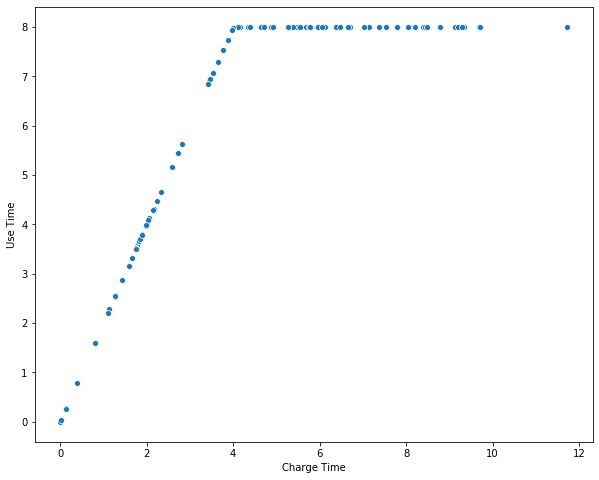

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Charge Time', y='Use Time', data=df)

#### Analysis:
From the scatter plot above, it looks like when charge time is greater than or equal to 4 hours, the use time stay constant at 8 hours.

In [19]:
ct_0to4 = df.loc[df['Charge Time'] < 4]
# Check dataframe
ct_0to4['Charge Time'].max()

3.99

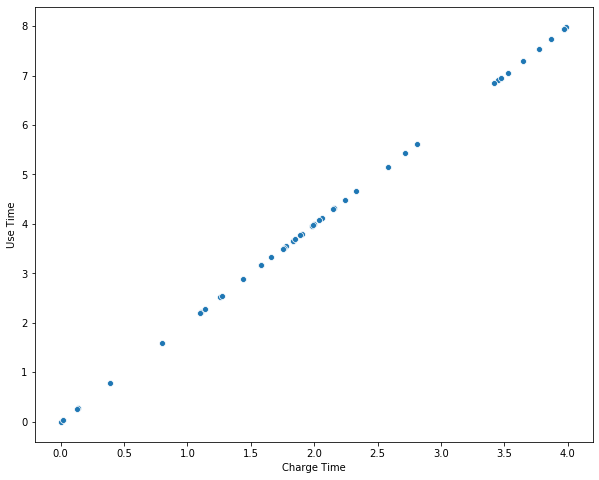

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Charge Time', y='Use Time', data=ct_0to4)

### Linear Regression Modelling

In [28]:
X_train = pd.DataFrame(ct_0to4['Charge Time'])
Y = pd.DataFrame(ct_0to4['Use Time'])

model = linear_model.LinearRegression()
model.fit(X_train, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
digit = 2
print('Slope of regression line: {0:{1}f}'.format(model.coef_[0][0], digit))
print('Intercept of regression line: {0:{1}f}'.format(model.intercept_[0], digit))

Slope of regression line: 2.000000
Intercept of regression line: 0.000000


### Solution:
 `if timeCharged >= 4:
     print(8.00)
  else:
     result = 2*timeCharged
     print(round(result, 2))`
        